In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
sns.set_style("white")

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer(as_frame=True)

In [4]:
features = cancer.data
target = cancer.target.astype('category')

# Variance of the Decision Trees

In [41]:
from collections import defaultdict
from sklearn.metrics import classification_report

def assess_model_variance(clf, label, nruns=20):
    train_accuracy = defaultdict(np.float)
    test_accuracy = defaultdict(np.float)
    
    for i in range(nruns):
        X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
        
        _ = clf.fit(X_train, y_train)

        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

    df_accuracy = pd.DataFrame({'Train Accracy': train_accuracy, 'Test Accuracy': test_accuracy})
    
    ax = df_accuracy.plot(title="Train and Test Accuracy of {}".format(label))
    _ = ax.set_xlabel("Run #")
    _ = ax.set_ylabel("Prediction Accuracy")
    _ = ax.set_ylim(0.7, 1.1)
    _ = ax.set_xlim(1, nruns)
    
    return df_accuracy

In [42]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0, max_depth=5)

(Train Accracy    0.984615
 Test Accuracy    0.877193
 dtype: float64,
 Train Accracy    0.997802
 Test Accuracy    0.982456
 dtype: float64,
 Train Accracy    0.992308
 Test Accuracy    0.937719
 dtype: float64,
 Train Accracy    0.003601
 Test Accuracy    0.030507
 dtype: float64)

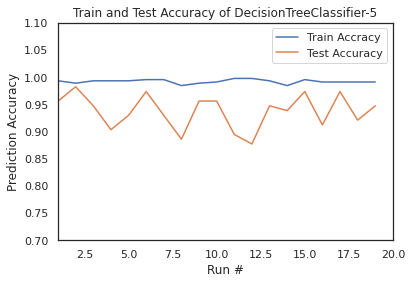

In [43]:
df = assess_model_variance(tree_clf, 'DecisionTreeClassifier-5')
df.min(), df.max(), df.mean(), df.std()

,Train Accracy,Test Accuracy
0,0.993407,0.947368
1,0.993407,0.956140
2,0.989011,0.982456
3,0.993407,0.947368
4,0.993407,0.903509
5,0.993407,0.929825
6,0.995604,0.973684
7,0.995604,0.929825
8,0.984615,0.885965
9,0.989011,0.956140


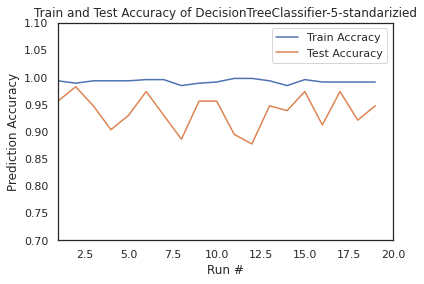

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=0, max_depth=5))
assess_model_variance(tree_clf, 'DecisionTreeClassifier-5-standarizied')

In [9]:
from collections import defaultdict
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import SVG, Image, display
import graphviz
import pydotplus

train_accuracy = defaultdict(np.float)
test_accuracy = defaultdict(np.float)

for i in range(11):
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
    tree_clf = DecisionTreeClassifier(random_state=0, max_depth=5)
    _ = tree_clf.fit(X_train, y_train)
    
    export_graphviz(tree_clf, out_file="tree{:02d}.dot".format(i), class_names=["maligant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)
    
    train_accuracy[i] = tree_clf.score(X_train, y_train)
    test_accuracy[i] = tree_clf.score(X_test, y_test)
    

In [10]:
df_accuracy = pd.DataFrame({'Train Accracy': train_accuracy, 'Test Accuracy': test_accuracy})
df_accuracy

,Train Accracy,Test Accuracy
0,0.993407,0.947368
1,0.993407,0.956140
2,0.989011,0.982456
3,0.993407,0.947368
4,0.993407,0.903509
5,0.993407,0.929825
6,0.995604,0.973684
7,0.995604,0.929825
8,0.984615,0.885965
9,0.989011,0.956140


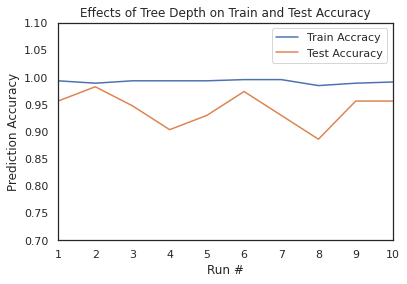

In [11]:
ax = df_accuracy.plot(title="Effects of Tree Depth on Train and Test Accuracy")
_ = ax.set_xlabel("Run #")
_ = ax.set_ylabel("Prediction Accuracy")
_ = ax.set_ylim(0.7, 1.1)
_ = ax.set_xlim(1, 10)

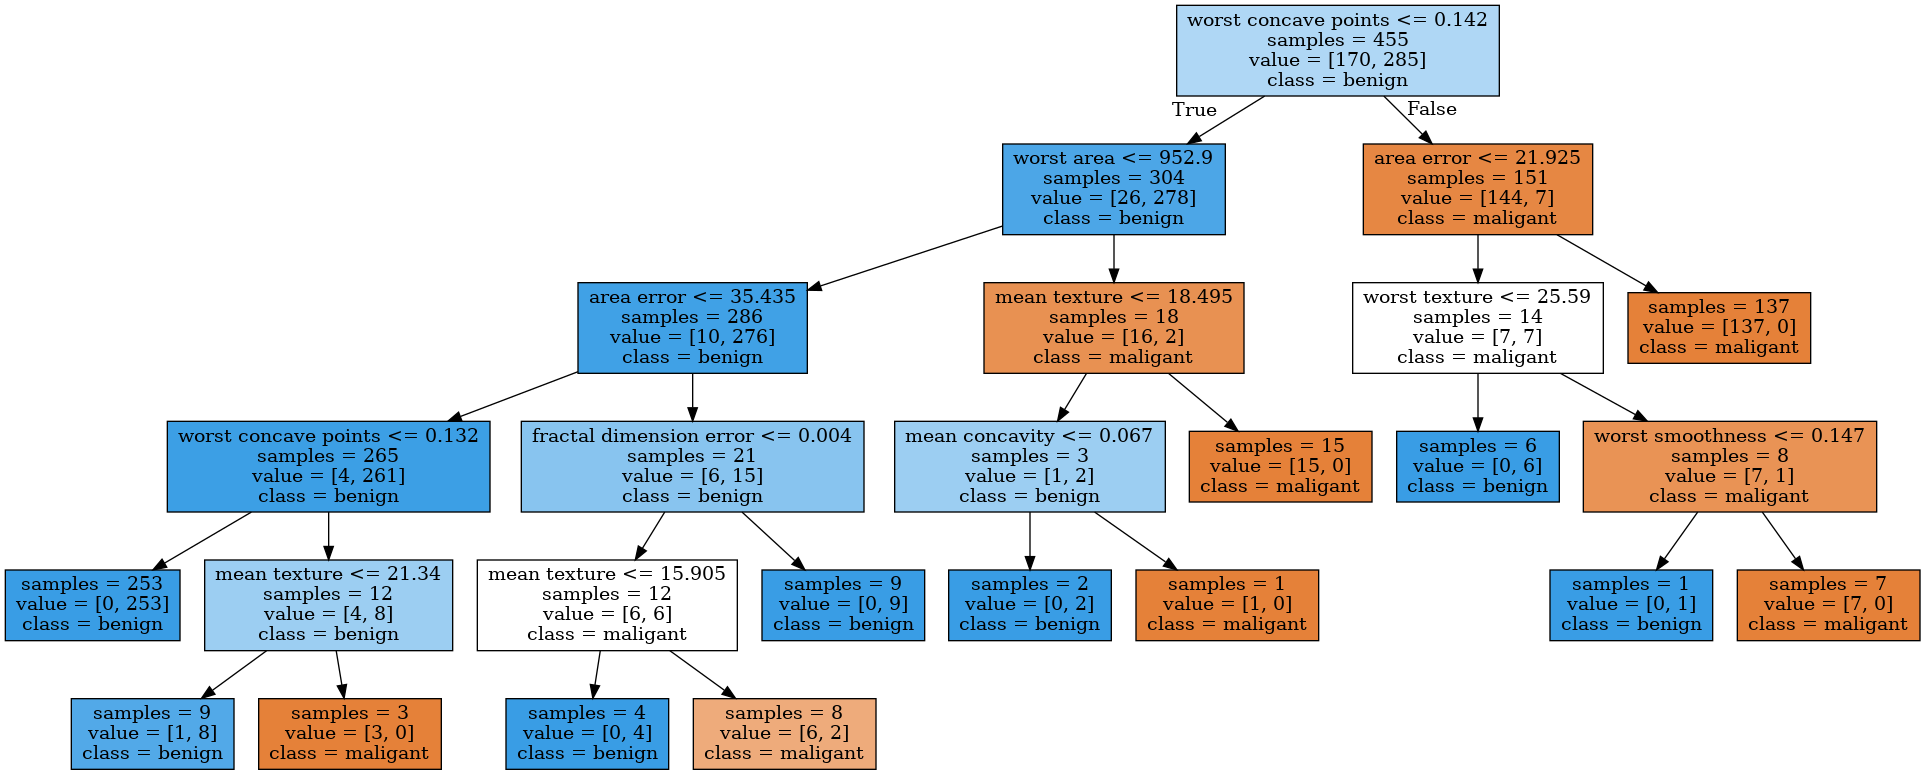

In [12]:
graph = pydotplus.graph_from_dot_file("tree00.dot")
Image(graph.create_png())

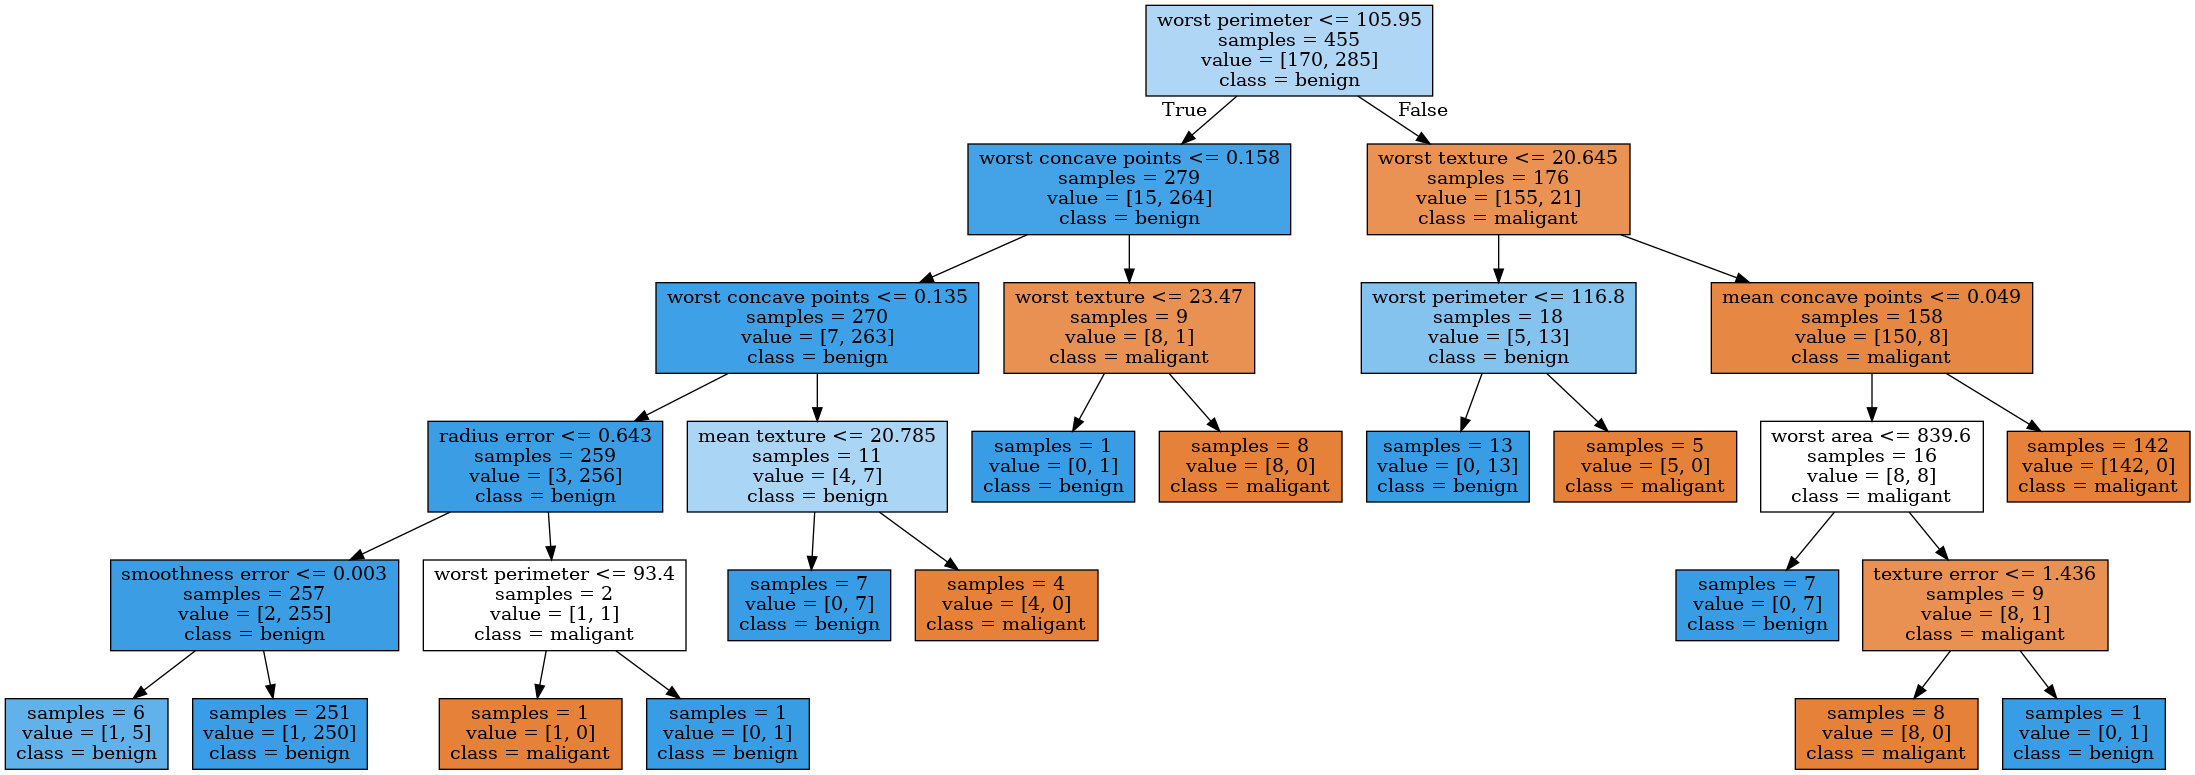

In [13]:
graph = pydotplus.graph_from_dot_file("tree07.dot")
Image(graph.create_png())

# Different Classifiers

,Train Accracy,Test Accuracy
0,0.989011,0.982456
1,0.986813,0.991228
2,0.989011,0.982456
3,0.989011,0.973684
4,0.993407,0.973684
5,0.989011,0.982456
6,0.986813,0.991228
7,0.989011,0.964912
8,0.989011,0.973684
9,0.984615,1.000000


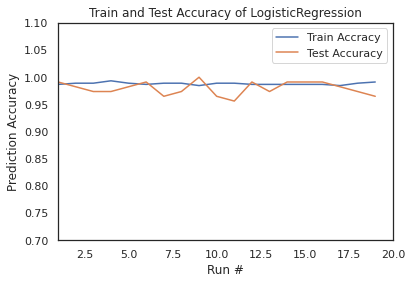

In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), LogisticRegression(fit_intercept=True, max_iter=5000))

assess_model_variance(clf, 'LogisticRegression')

,Train Accracy,Test Accuracy
0,0.982418,0.956140
1,0.980220,0.973684
2,0.975824,0.982456
3,0.973626,0.973684
4,0.971429,0.982456
5,0.975824,0.973684
6,0.980220,0.982456
7,0.978022,0.982456
8,0.975824,0.973684
9,0.978022,0.991228


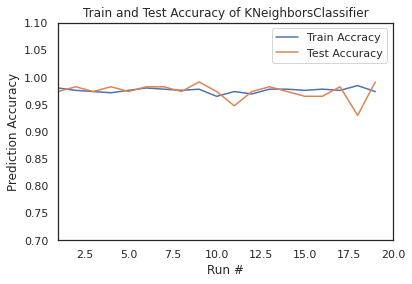

In [15]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
assess_model_variance(clf, 'KNeighborsClassifier')

,Train Accracy,Test Accuracy
0,0.936264,0.903509
1,0.940659,0.921053
2,0.940659,0.964912
3,0.934066,0.938596
4,0.929670,0.938596
5,0.940659,0.956140
6,0.936264,0.964912
7,0.936264,0.912281
8,0.940659,0.956140
9,0.938462,0.956140


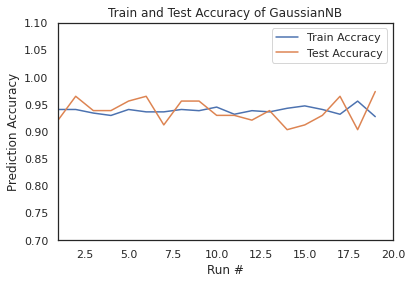

In [16]:
# GaussianNB Classifier
from sklearn.naive_bayes import GaussianNB
clf = make_pipeline(StandardScaler(), GaussianNB())
assess_model_variance(clf, 'GaussianNB')

,Train Accracy,Test Accuracy
0,0.986813,0.964912
1,0.989011,0.973684
2,0.986813,0.991228
3,0.989011,0.982456
4,0.989011,0.973684
5,0.989011,0.973684
6,0.986813,0.982456
7,0.984615,0.982456
8,0.984615,0.956140
9,0.984615,0.991228


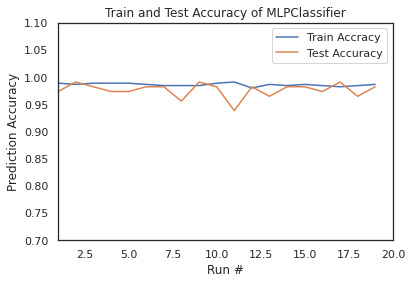

In [17]:
from sklearn.neural_network import MLPClassifier
clf = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=3, random_state=1, max_iter=1000))
assess_model_variance(clf, 'MLPClassifier')

In [18]:
df_accuracy

,Train Accracy,Test Accuracy
0,0.993407,0.947368
1,0.993407,0.956140
2,0.989011,0.982456
3,0.993407,0.947368
4,0.993407,0.903509
5,0.993407,0.929825
6,0.995604,0.973684
7,0.995604,0.929825
8,0.984615,0.885965
9,0.989011,0.956140


,Train Accracy,Test Accuracy
0,0.989011,0.964912
1,0.989011,0.982456
2,0.980220,0.982456
3,0.984615,0.973684
4,0.989011,0.956140
5,0.984615,0.982456
6,0.986813,0.982456
7,0.984615,0.956140
8,0.986813,0.982456
9,0.991209,0.982456


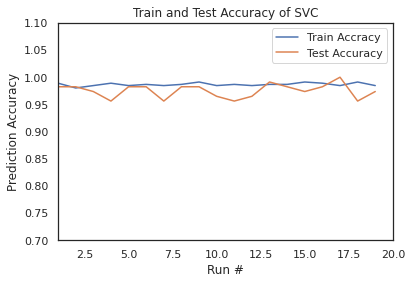

In [19]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
df_accuracy = assess_model_variance(clf, 'SVC')
df_accuracy

In [20]:
# Bagging

,Train Accracy,Test Accuracy
0,1.0,0.947368
1,1.0,0.956140
2,1.0,0.982456
3,1.0,0.973684
4,1.0,0.982456
5,1.0,0.973684
6,1.0,0.982456
7,1.0,0.947368
8,1.0,0.956140
9,1.0,0.973684


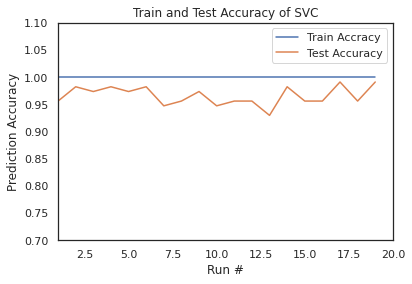

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf = make_pipeline(StandardScaler(), RandomForestClassifier())
df_accuracy = assess_model_variance(clf, 'SVC')
df_accuracy

In [22]:
# Compare Classifiers

In [23]:
from collections import defaultdict
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

test_accuracy = defaultdict(list)
def assess_model(clf, label, nruns=20):
    for i in range(nruns):
        X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
        
        _ = clf.fit(X_train, y_train)

        test_accuracy[label].append(clf.score(X_test, y_test))

        
models = {
    'RandomForestClassifier': make_pipeline(StandardScaler(), RandomForestClassifier()),
    'SVC': make_pipeline(StandardScaler(), SVC(gamma='auto')),
    'GaussianNB': make_pipeline(StandardScaler(), GaussianNB()),
    'MLPClassifier': make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=3, random_state=1, max_iter=1000)),
    'KNeighborsClassifier': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    'LogisticRegression': make_pipeline(StandardScaler(), LogisticRegression(fit_intercept=True, max_iter=5000)),
}

for label, clf in models.items():
    assess_model(clf, label)
        
df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,RandomForestClassifier,SVC,GaussianNB,MLPClassifier,KNeighborsClassifier,LogisticRegression
0,0.947368,0.964912,0.903509,0.964912,0.956140,0.982456
1,0.964912,0.982456,0.921053,0.973684,0.973684,0.991228
2,0.982456,0.982456,0.964912,0.991228,0.982456,0.982456
3,0.964912,0.973684,0.938596,0.982456,0.973684,0.973684
4,0.964912,0.956140,0.938596,0.973684,0.982456,0.973684
5,0.964912,0.982456,0.956140,0.973684,0.973684,0.982456
6,0.973684,0.982456,0.964912,0.982456,0.982456,0.991228
7,0.956140,0.956140,0.912281,0.982456,0.982456,0.964912
8,0.973684,0.982456,0.956140,0.956140,0.973684,0.973684
9,0.956140,0.982456,0.956140,0.991228,0.991228,1.000000


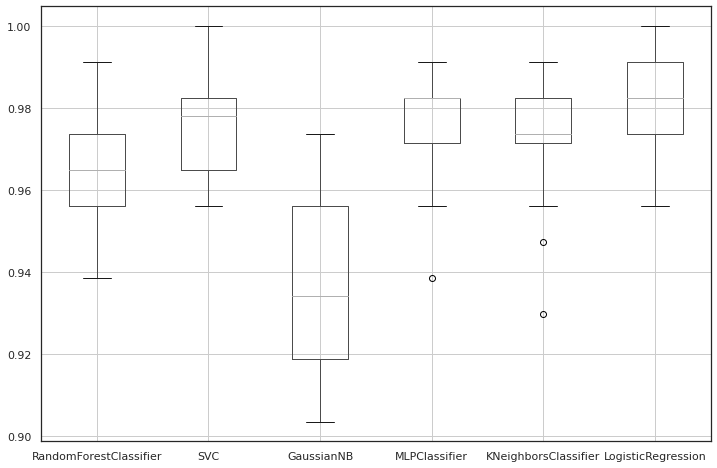

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

## Voting Class

In [25]:
test_accuracy = defaultdict(list)
        
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(gamma='auto'),
    'GaussianNB': GaussianNB(),
    'MLP': MLPClassifier(hidden_layer_sizes=3, random_state=1, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression(fit_intercept=True, max_iter=5000)
}
scaler = StandardScaler()
volting_clf = VotingClassifier(
    estimators=[(label, clf) for label, clf in models.items()],
    voting='hard'
)
models['VotingC'] = volting_clf

test_accuracy = defaultdict(list)
nruns = 20

for i in range(nruns):
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
    _ = scaler.fit(X_train)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.fit_transform(X_test)
    for label, clf in models.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))

df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,RandomForest,SVC,GaussianNB,MLP,KNN,LogisticRegression,VotingC
0,0.947368,0.964912,0.894737,0.964912,0.956140,0.964912,0.964912
1,0.964912,0.982456,0.912281,0.982456,0.973684,0.991228,0.991228
2,0.982456,0.991228,0.964912,0.991228,0.982456,0.982456,0.991228
3,0.964912,0.973684,0.947368,0.982456,0.964912,0.973684,0.982456
4,0.982456,0.964912,0.938596,0.973684,0.982456,0.973684,0.973684
5,0.973684,0.973684,0.938596,0.973684,0.973684,0.982456,0.982456
6,0.964912,0.982456,0.973684,0.982456,0.991228,0.991228,0.991228
7,0.938596,0.982456,0.929825,0.973684,0.973684,0.973684,0.982456
8,0.991228,0.973684,0.956140,0.964912,0.956140,0.982456,0.973684
9,0.956140,0.991228,0.964912,1.000000,0.982456,0.991228,0.991228


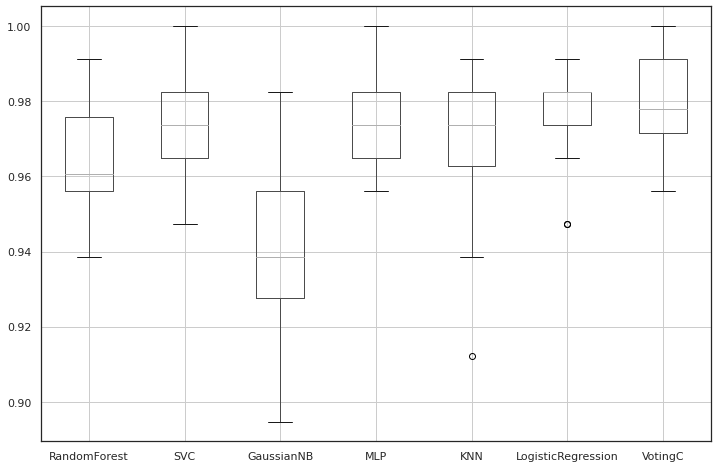

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

In [27]:
# Bagging on Palmetto

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

test_accuracy = defaultdict(list)
        
models = {
    'DecisionTree': DecisionTreeClassifier(max_depth=6)
}
scaler = StandardScaler()
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1)
models['bagging-DecisionTree'] = bag_clf

test_accuracy = defaultdict(list)
nruns = 20

for i in range(nruns):
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
    _ = scaler.fit(X_train)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.fit_transform(X_test)
    for label, clf in models.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))
    for label, clf in baggings.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))


df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,DecisionTree,bagging-DecisionTree
0,0.921053,0.921053
1,0.956140,0.964912
2,0.973684,0.982456
3,0.921053,0.964912
4,0.912281,0.982456
5,0.921053,0.956140
6,0.964912,0.964912
7,0.964912,0.938596
8,0.903509,0.973684
9,0.964912,0.956140


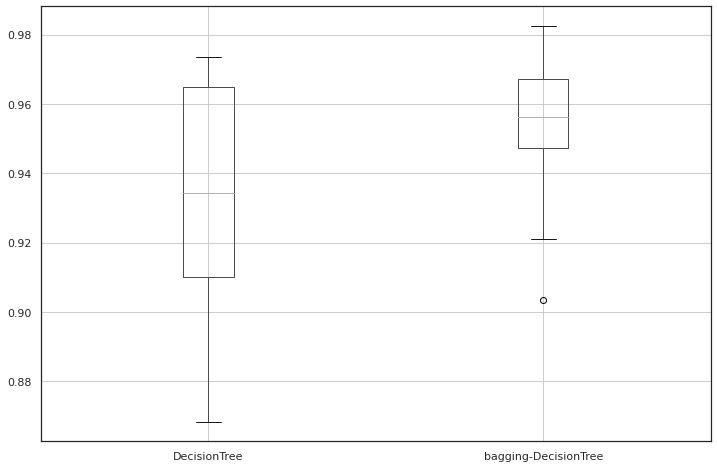

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

In [30]:
# Bagging OOB

In [46]:
models = {
    'DecisionTree': DecisionTreeClassifier(max_depth=6)
}
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1)
models['bagging-DecisionTree'] = bag_clf
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=500,
                            max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
models['bagging-DecisionTree-oob'] = bag_clf

In [47]:
test_accuracy = defaultdict(list)
nruns = 20

for i in range(nruns):
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
    _ = scaler.fit(X_train)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.fit_transform(X_test)
    for label, clf in models.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))
        if label == 'bagging-DecisionTree-oob':
            test_accuracy['oob_score'] = clf.oob_score_
            

df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,DecisionTree,bagging-DecisionTree,bagging-DecisionTree-oob,oob_score
0,0.921053,0.929825,0.921053,0.953846
1,0.964912,0.956140,0.956140,0.953846
2,0.991228,0.991228,0.964912,0.953846
3,0.912281,0.956140,0.964912,0.953846
4,0.929825,0.982456,0.982456,0.953846
5,0.929825,0.956140,0.964912,0.953846
6,0.973684,0.973684,0.964912,0.953846
7,0.973684,0.938596,0.938596,0.953846
8,0.885965,0.973684,0.973684,0.953846
9,0.929825,0.956140,0.956140,0.953846


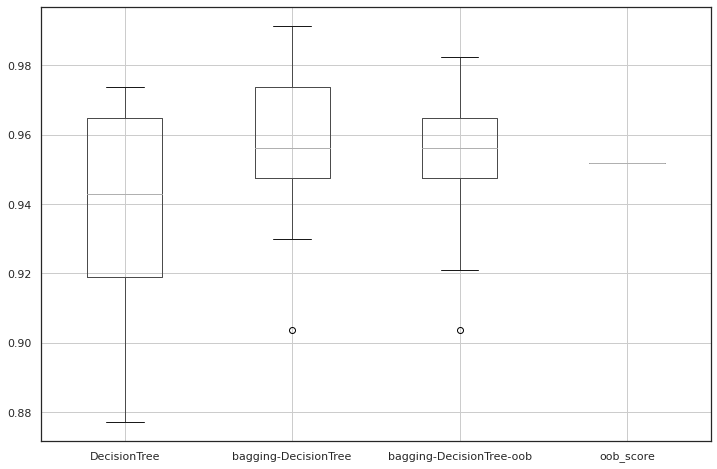

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

In [34]:
# Random Forest

In [35]:
test_accuracy = defaultdict(list)
nruns = 20

models = {
    'RandomForest-100': RandomForestClassifier(n_estimators=100),
    'RandomForest-200': RandomForestClassifier(n_estimators=200),
    'RandomForest-500': RandomForestClassifier(n_estimators=500)
}

for i in range(nruns):
    X_train, X_test, y_train, y_test = train_test_split(features, target, 
                        stratify=target, test_size=0.2, random_state=i)
    _ = scaler.fit(X_train)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.fit_transform(X_test)
    for label, clf in models.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))

df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,RandomForest-100,RandomForest-200,RandomForest-500
0,0.947368,0.947368,0.947368
1,0.956140,0.956140,0.964912
2,0.982456,0.982456,0.982456
3,0.964912,0.964912,0.964912
4,0.973684,0.973684,0.982456
5,0.973684,0.973684,0.973684
6,0.964912,0.964912,0.964912
7,0.938596,0.947368,0.947368
8,0.964912,0.973684,0.973684
9,0.956140,0.956140,0.956140


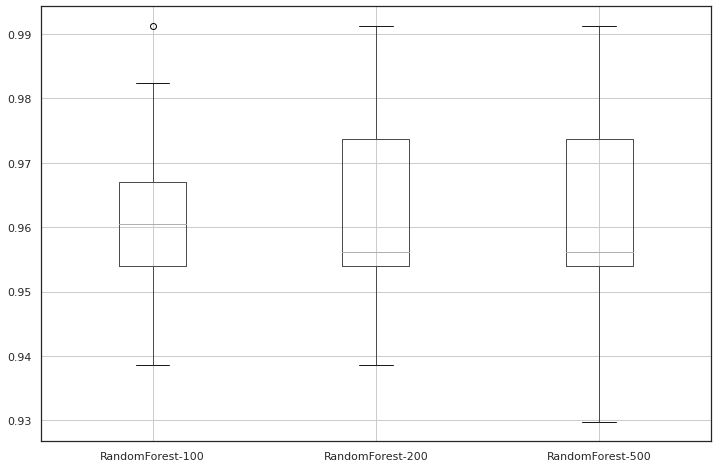

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
test_accuracy = defaultdict(list)
nruns = 20

models = {
    'AdaBoost-00': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                       n_estimators=100, algorithm="SAMME.R", learning_rate=0.5),
    'AdaBoost-200': AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                       n_estimators=200, algorithm="SAMME.R", learning_rate=0.2),
}


for i in range(nruns):
    X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target, test_size=0.2, random_state=i)
    _ = scaler.fit(X_train)
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.fit_transform(X_test)
    for label, clf in models.items():
        _ = clf.fit(X_train_s, y_train)
        test_accuracy[label].append(clf.score(X_test_s, y_test))

df_accuracy = pd.DataFrame(test_accuracy)
df_accuracy

,AdaBoost-00,AdaBoost-200
0,0.964912,0.964912
1,0.982456,0.973684
2,0.956140,0.964912
3,0.964912,0.964912
4,0.973684,0.973684
5,0.973684,0.982456
6,0.973684,0.973684
7,0.973684,0.982456
8,0.982456,0.982456
9,0.991228,0.991228


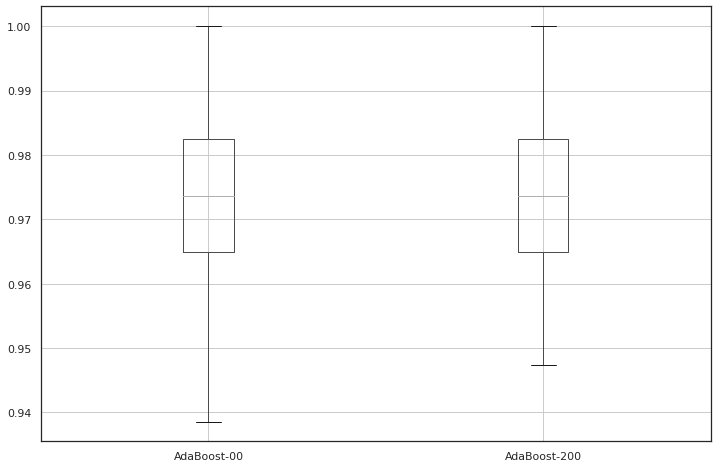

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_accuracy.boxplot()

In [40]:
# XGBoost